# **Logistic Regression in Tensorflow 2.x**

Goal of this project is to implement Logistic Regression in Tensorflow to do the binary classification on the breast cancer dataset provide by sklearn.

## **Dataset description**
Classes
*   benign tumor:0
*   malignant tumor:1

Number of Features: 30

Number of Samples: 569

Features 30 features (mean radius, mean texture, mean perimeter, mean area, mean smothness ...)

In Google Colab import Tensorflow 2.x version

In [0]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

In [0]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [0]:
# Load the data
data = load_breast_cancer()

In [0]:
# check the type of data
type(data)

sklearn.utils.Bunch

In [61]:
# it is a bunch obect
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
# 'data' attributes, means the input data
data.data.shape

(569, 30)

In [0]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.target.shape

(569,)

## Check the Feature Names

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Split the data into Training dataset 70% Test dataset 30%

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
N, D = X_train.shape

Standardize the data before we traning them, otherwise some features values might be too large compare to others, it will result small coefficient when applying the optimization, difficult to converage.

In [0]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [0]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Build up the Tensorflow model

In [0]:
# Tensorflow build the model
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(D,)),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

# Alternatively
# model = tf.keras.Sequential()
# model.add(tf.keras.layer.Dense(1, input_shape=(D,), activation='sigmoid'))

Define the optimization algorithm and loss function

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
# training the model
r = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100)

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 0s 964us/sample - loss: 0.5027 - accuracy: 0.7312 - val_loss: 0.4870 - val_accuracy: 0.7778
Epoch 2/100
398/398 [==============================] - 0s 86us/sample - loss: 0.4508 - accuracy: 0.7839 - val_loss: 0.4419 - val_accuracy: 0.8070
Epoch 3/100
398/398 [==============================] - 0s 87us/sample - loss: 0.4088 - accuracy: 0.8166 - val_loss: 0.4036 - val_accuracy: 0.8363
Epoch 4/100
398/398 [==============================] - 0s 93us/sample - loss: 0.3728 - accuracy: 0.8518 - val_loss: 0.3720 - val_accuracy: 0.8596
Epoch 5/100
398/398 [==============================] - 0s 90us/sample - loss: 0.3440 - accuracy: 0.8668 - val_loss: 0.3446 - val_accuracy: 0.8772
Epoch 6/100
398/398 [==============================] - 0s 89us/sample - loss: 0.3197 - accuracy: 0.8794 - val_loss: 0.3214 - val_accuracy: 0.8830
Epoch 7/100
398/398 [==============================] - 0s 91us/sample - loss:

In [0]:
# Evaluate the model
print("Train score: ",model.evaluate(X_train,y_train))
print("Test score: ",model.evaluate(X_test,y_test))

398/398 [==============================] - 0s 51us/sample - loss: 0.0846 - accuracy: 0.9824
Train score:  [0.08457281374976264, 0.98241204]
171/171 [==============================] - 0s 66us/sample - loss: 0.0852 - accuracy: 0.9708
Test score:  [0.08520315509093435, 0.9707602]


In [0]:
# Plot what's returned by model.fit() object
import matplotlib.pyplot as plt

After 100 iterations the loss of training data and loss of test data are approching the same value.

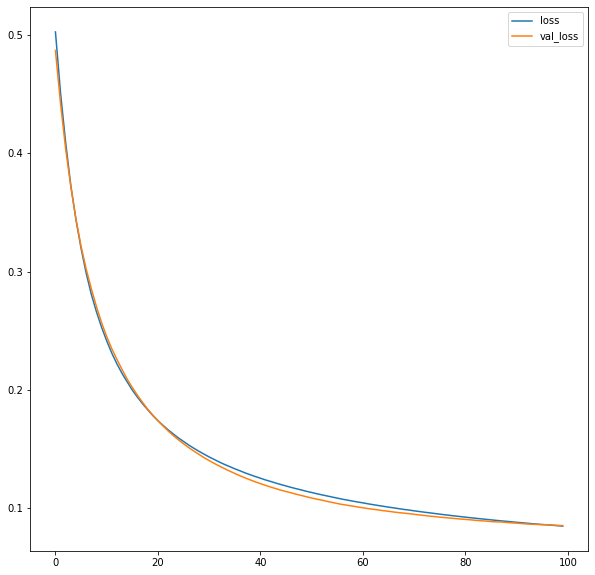

In [72]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.rcParams['figure.figsize'] = [10,10]

The accuracy of taining data and test data are reaching to 98% and 97%

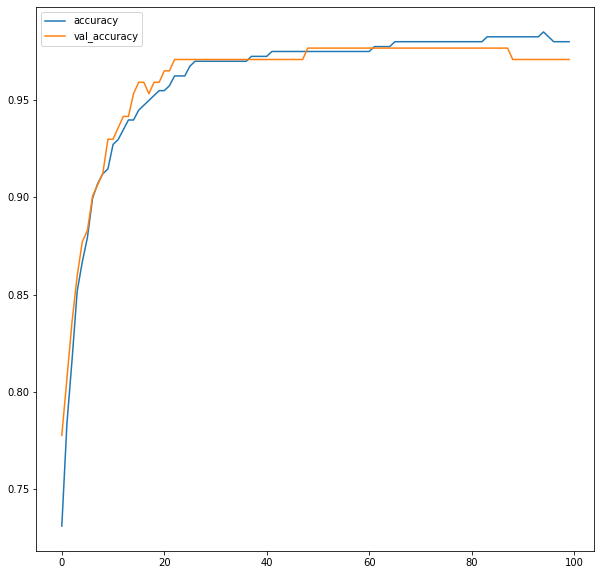

In [73]:
# plot the accuracy
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.rcParams['figure.figsize'] = [10,10]

# Make prediction

In [0]:
# Make prediction
P = model.predict(X_test)

In [0]:
# round to get classification result
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0.]


In [0]:
# Calculate accuracy
print("Manually calculated accuracy:",np.mean(P==y_test))
print('Evaluate output:'),model.evaluate(X_test,y_test)

Manually calculated accuracy: 0.9707602339181286
Evaluate output:
171/171 [==============================] - 0s 76us/sample - loss: 0.0852 - accuracy: 0.9708


(None, [0.08520315509093435, 0.9707602])